# Notes

**Focus on**:
- Quality of data
- Log your data and calls when using data scraping
- Creativity
- Visualization (explanatory figures), simple is better
- Be critical of your data collection and generating process
    - Bias
    - Missing data
        - Ignore
        - Collect new data
        - Remove or replace missing data
    - Internal and external validity
    - Data collection type (random, survey, big data, other)
- Less focus on the analytical section and more on the collection and presentation

### Reflect on the ethical aspect
- Do yourespectprivacy? 
- Can single individualsbeidentified? 
- What are the potential consequences?
- Are there ethical considerations?
    - With respect to individuals? 
    - With respectto firmsor organizations?
- Consider the GDPR:
    - Is it anonymous? 
    - Personal data or statistics?
    - Any change of re-identification?

### Project ideas

- Factor based investing (use google or yahoo finance API)
- Trump tweet correlation with stock market
- Don't use LinkedIn
- 


### Logging

- Log your calls, use it to determine success ratio
    - Where did the call fail? Rewrite code.
    - Don't be greedy. time.sleep(0.5) between each call.
- Visualize the log (lecture 10)

We start by importing our data source to Python. The file *tweets.json* is created from [the Trump twitter archive](http://www.trumptwitterarchive.com/archive). We have selected all tweets from the 20th of January 2017 (assumed office) to 21st of August 2019.

In [2]:
# CODE BIN:
# # Loading dataset from file using a relative path
# with codecs.open('tweets.json', 'r', 'utf-8-sig') as json_file:  
#     data = json.load(json_file)
#     df=pd.DataFrame(data) # converting to a pandas data frame
    

In [3]:
# Importing packages
import pandas as pd
import json, codecs
import scraping_class, time

logfile = 'my_log'## name your log file.
connector = scraping_class.Connector(logfile)
data = []
# Fetching data
for i in range(2017,2020):
    url = 'http://www.trumptwitterarchive.com/data/realdonaldtrump/'+str(i)+'.json'
    r, call_id = connector.get(url, 'Tweets')
    json_file = r.json() 
    data += json_file[::-1] # invert list
    time.sleep(0.5) # set sleep timer to prevent unintentional DOS attacks


In [38]:
# Creating and manipulating dataframe    
df = pd.DataFrame(data)
keywords = ['china', 'tariff','mexico','europe','billions','trade-war','war'] # list of relevant keywords
df['keyword'] = df['text'].str.contains('(?i)|'.join(keywords)) # search for keywords while ignoring word case (upper/lower)
df_filter = df.query("is_retweet == False") #& keyword == True"# filter query to remove retweets and non relevant tweets
date = [i[2]+i[1]+i[-1]+'-'+i[3] for i in df_filter['created_at'].str.split(' ')] # slice date
df_filter['date'] = date
df_filter['date'] = pd.to_datetime(df_filter['date'], format='%d%b%Y-%H:%M:%S') 
df_filter = df_filter.reset_index(drop=True).sort_values(by=['date']) # set index to date
df_filter.head()

C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,keyword,date
0,Sun Jan 01 05:00:10 +0000 2017,126230,815422340540547073,None,False,32665,Twitter for iPhone,TO ALL AMERICANS-\n#HappyNewYear &amp; many bl...,True,2017-01-01 05:00:10
1,Mon Jan 02 14:40:10 +0000 2017,124024,815930688889352192,None,False,29248,Twitter for Android,"Well, the New Year begins. We will, together, ...",False,2017-01-02 14:40:10
2,Mon Jan 02 17:31:17 +0000 2017,63340,815973752785793024,None,False,17411,Twitter for Android,"Chicago murder rate is record setting - 4,331 ...",False,2017-01-02 17:31:17
3,Mon Jan 02 18:32:29 +0000 2017,13862,815989154555297792,759251,False,3948,Twitter for Android,"@CNN just released a book called ""Unprecedente...",False,2017-01-02 18:32:29
4,Mon Jan 02 18:37:10 +0000 2017,47285,815990335318982656,None,False,9057,Twitter for Android,Various media outlets and pundits say that I t...,False,2017-01-02 18:37:10


In [141]:
#print(set(df_filter['is_retweet'])) #Check if only False in retweet
#df_filter = df_filter.drop(['is_retweet'], axis = 1) #Then dropping it
#df_filter

In [142]:
print('Since 2017 Mr. Trump has made', len(df), 'tweets')
print('When removing retweets', len(df_filter), 'tweets')


Since 2017 Mr. Trump has made 9855 tweets
When removing retweets 7974 tweets


In [143]:
# tweet_china = []
# keywords = ['china', 'trade-war', 'tariff']
# for i in range(len(df['text'])):
#      for key in keywords:
#             if key in (df['text'][i].lower()):
#                 tweet_china.append(df['text'][i].count(key))

                
# Tælle antal tweets med de forskellige keywords
# Sammenholde tweets med tid - i forhold til vores cases
# columns = ['china', 'mexico']
# counts = [0, 0]
#stat = pd.DataFrame(counts,columns)
# count_china = 0
# for i in range(len(df_filter['text'])):
#      for key in keywords:
#             if key in df_filter['text'][i].lower():
#                 count_china += df_filter['text'][i].count(key)
                
# print(count_china)
keywords = ['China', 'Xi', 'trade war'] #Keys to search for in tweets
results = {} #Dictionary to store results
for key in keywords:
    print('Sum of tweets containing', key, ':', sum(df_filter['text'].str.contains('(?i)'+str(key))))
    results[key]=sum(df_filter['text'].str.contains('(?i)'+str(key))) #Saving the sum of tweets (ignoring case) containing the key
    
                
                

# for _ in range(tweet_china)
#         if in df['text'][i]:
#             tweet_both.append(df['text'][i])
results
        


Sum of tweets containing China : 277
Sum of tweets containing Xi : 391
Sum of tweets containing trade war : 9


{'China': 277, 'Xi': 391, 'trade war': 9}

In [144]:
keywords = ['china', 'xi'] #LOWERCASE keys to search for
result_count = {} # empty dictionary to store results


for key in keywords:
    count_=0 #resetting the counter
    for i in range(len(df_filter['text'])): # Looping through all the rows of tweets
        if key in df_filter['text'][i].lower(): # Checking for the key in  the i'th tweet (in lowercase)
            count_ += df_filter['text'][i].lower().count(key) # given the key is found we count the number of times it occurs
        result_count[key]=count_ # Store the count for a given key in the dictionary
                    
                        
result_count

{'china': 356, 'xi': 420}

In [157]:
# Display timing of keywords
# Count of 'China' over time
# Tweets om dagen

print(df_filter['date'].describe())
print(type(df_filter['date'][0]))

count                    7974
unique                   7773
top       2019-05-20 11:20:53
freq                        4
first     2017-01-01 05:00:10
last      2019-08-22 01:54:53
Name: date, dtype: object
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [161]:
df_filter.index = df_filter['date']
del df_filter['date']
del df_filter['created_at']
df_filter

,favorite_count,id_str,in_reply_to_user_id_str,retweet_count,source,text,keyword
date,,,,,,,
2017-01-01 05:00:10,126230,815422340540547073,None,32665,Twitter for iPhone,TO ALL AMERICANS-\n#HappyNewYear &amp; many bl...,True
2017-01-02 14:40:10,124024,815930688889352192,None,29248,Twitter for Android,"Well, the New Year begins. We will, together, ...",False
2017-01-02 17:31:17,63340,815973752785793024,None,17411,Twitter for Android,"Chicago murder rate is record setting - 4,331 ...",False
2017-01-02 18:32:29,13862,815989154555297792,759251,3948,Twitter for Android,"@CNN just released a book called ""Unprecedente...",False
2017-01-02 18:37:10,47285,815990335318982656,None,9057,Twitter for Android,Various media outlets and pundits say that I t...,False
2017-01-02 18:44:04,62670,815992069412057088,None,13437,Twitter for Android,"I thought and felt I would win big, easily ove...",False
2017-01-02 23:05:44,92256,816057920223846400,None,26703,Twitter for Android,North Korea just stated that it is in the fina...,False
2017-01-02 23:47:12,64480,816068355555815424,None,17507,Twitter for Android,China has been taking out massive amounts of m...,True
2017-01-03 12:30:05,73104,816260343391514624,None,18864,Twitter for Android,General Motors is sending Mexican made model o...,False


date
2017-01-31    204
2017-02-28    153
2017-03-31    135
2017-04-30    138
2017-05-31    144
2017-06-30    177
2017-07-31    227
2017-08-31    198
2017-09-30    249
2017-10-31    255
2017-11-30    237
2017-12-31    175
2018-01-31    129
2018-02-28    166
2018-03-31    164
2018-04-30    226
2018-05-31    239
2018-06-30    333
2018-07-31    275
2018-08-31    350
2018-09-30    288
2018-10-31    332
2018-11-30    268
2018-12-31    279
2019-01-31    290
2019-02-28    193
2019-03-31    290
2019-04-30    323
2019-05-31    406
2019-06-30    362
2019-07-31    498
2019-08-31    271
Freq: M, Name: text, dtype: int64
7974


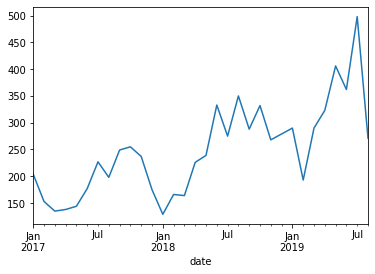

In [209]:
import matplotlib.pyplot as plt
#df_filter.groupby(level=0).count()
print(df_filter['text'].resample('M').count())
print(df_filter['text'].resample('M').count().sum())
df_filter['text'].resample('M').count().plot()

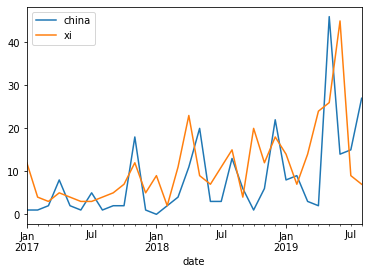

In [207]:
# Virker:
# print(df_filter['keyword'].resample('M').sum())
# print(sum(df_filter['keyword'].resample('M').sum()))
# df_filter['keyword'].resample('M').sum().plot()

results_time = {}
for key in keywords:
    results_time[key] = df_filter['text'].str.contains('(?i)'+str(key)).resample('M').sum()
    df_filter['text'].str.contains('(?i)'+str(key)).resample('M').sum().plot(label=key)
    plt.legend()

#results_time
# print(df_filter['text'].resample('M').count().sum())
# df_filter['text'].resample('M').count().plot()

# for key in keywords:
#     print(df_filter['text'].str.contains('(?i)'+str(key)).resample('M').count())
# print(df_filter['text'].resample('M').count().sum())
# df_filter['text'].resample('M').count().plot()


In [201]:
results_time

{'china': date
 2017-01-31     1.0
 2017-02-28     1.0
 2017-03-31     2.0
 2017-04-30     8.0
 2017-05-31     2.0
 2017-06-30     1.0
 2017-07-31     5.0
 2017-08-31     1.0
 2017-09-30     2.0
 2017-10-31     2.0
 2017-11-30    18.0
 2017-12-31     1.0
 2018-01-31     0.0
 2018-02-28     2.0
 2018-03-31     4.0
 2018-04-30    11.0
 2018-05-31    20.0
 2018-06-30     3.0
 2018-07-31     3.0
 2018-08-31    13.0
 2018-09-30     6.0
 2018-10-31     1.0
 2018-11-30     6.0
 2018-12-31    22.0
 2019-01-31     8.0
 2019-02-28     9.0
 2019-03-31     3.0
 2019-04-30     2.0
 2019-05-31    46.0
 2019-06-30    14.0
 2019-07-31    15.0
 2019-08-31    27.0
 Freq: M, Name: text, dtype: float64, 'xi': date
 2017-01-31    12.0
 2017-02-28     4.0
 2017-03-31     3.0
 2017-04-30     5.0
 2017-05-31     4.0
 2017-06-30     3.0
 2017-07-31     3.0
 2017-08-31     4.0
 2017-09-30     5.0
 2017-10-31     7.0
 2017-11-30    12.0
 2017-12-31     5.0
 2018-01-31     9.0
 2018-02-28     2.0
 2018-03-31    1